<a href="https://colab.research.google.com/github/Mateus-Brandao/Deep_learning/blob/main/Classificacao_gato_cao_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras

In [2]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-08-04 17:09:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   132MB/s    in 0.5s    

2022-08-04 17:09:18 (132 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
!unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [4]:
dados_dir = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')

dados_treino_dir = os.path.join(dados_dir, 'train')

dados_validacao_dir = os.path.join(dados_dir, 'validation')

In [5]:
tamanho_dados_treino_gatos = len(os.listdir(os.path.join(dados_treino_dir,'cats')))
tamanho_dados_treino_caes = len(os.listdir(os.path.join(dados_treino_dir,'dogs')))

tamanho_dados_validacao_gatos = len(os.listdir(os.path.join(dados_validacao_dir,'cats')))
tamanho_dados_validacao_caes = len(os.listdir(os.path.join(dados_validacao_dir,'dogs')))

print(f'Existem {tamanho_dados_treino_gatos} imagens de gatos para treino.')
print(f'Existem {tamanho_dados_treino_caes} imagens de cães para treino.')
print(f'Existem {tamanho_dados_validacao_gatos} imagens de gatos para validação.')
print(f'Existem {tamanho_dados_validacao_caes} imagens de cães para validação.')

Existem 1000 imagens de gatos para treino.
Existem 1000 imagens de cães para treino.
Existem 500 imagens de gatos para validação.
Existem 500 imagens de cães para validação.


In [6]:
image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)

class_names = ['gato','cão']

In [7]:
dados_treino = tf.keras.preprocessing.image_dataset_from_directory(dados_treino_dir, image_size = image_size,
                                                                   batch_size = 32, shuffle = True)

Found 2000 files belonging to 2 classes.


In [8]:
dados_validacao = tf.keras.preprocessing.image_dataset_from_directory(
    dados_validacao_dir,
    image_size = (image_width, image_height),
    batch_size = 32,
    shuffle = True
)

Found 1000 files belonging to 2 classes.


In [9]:
dados_validacao_cardinalidade = tf.data.experimental.cardinality(dados_validacao)
dados_validacao_lotes = dados_validacao_cardinalidade // 5

dados_teste = dados_validacao.take(dados_validacao_lotes)
dados_validacao = dados_validacao.skip(dados_validacao_lotes)

print('Cardinalidade dos dados de validação: %d' % tf.data.experimental.cardinality(dados_validacao))
print('Cardinalidade dos dados de teste: %d' % tf.data.experimental.cardinality(dados_teste))

Cardinalidade dos dados de validação: 26
Cardinalidade dos dados de teste: 6


In [15]:
autotune = tf.data.AUTOTUNE

dados_treino = dados_treino.prefetch(buffer_size = autotune)
dados_validacao = dados_validacao.prefetch(buffer_size = autotune)
dados_teste = dados_validacao.prefetch(buffer_size = autotune)

In [16]:
def plot_dados(dados):

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, labels in dados.take(1):

        for i in range(9):

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])

<Figure size 432x288 with 0 Axes>

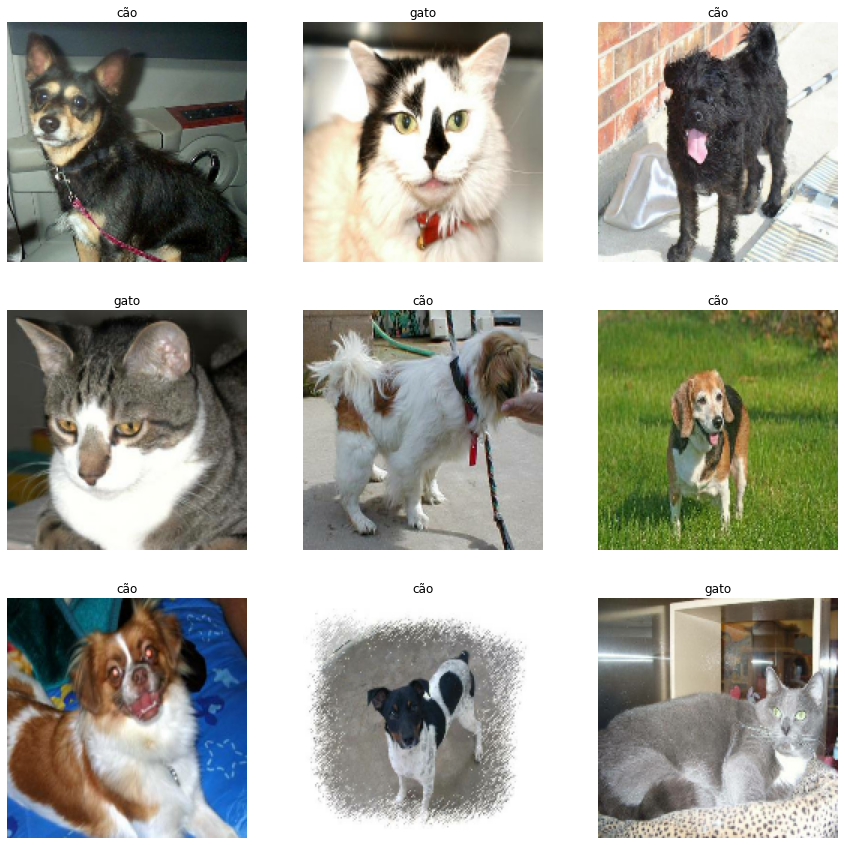

In [17]:
plot_dados(dados_treino)

<Figure size 432x288 with 0 Axes>

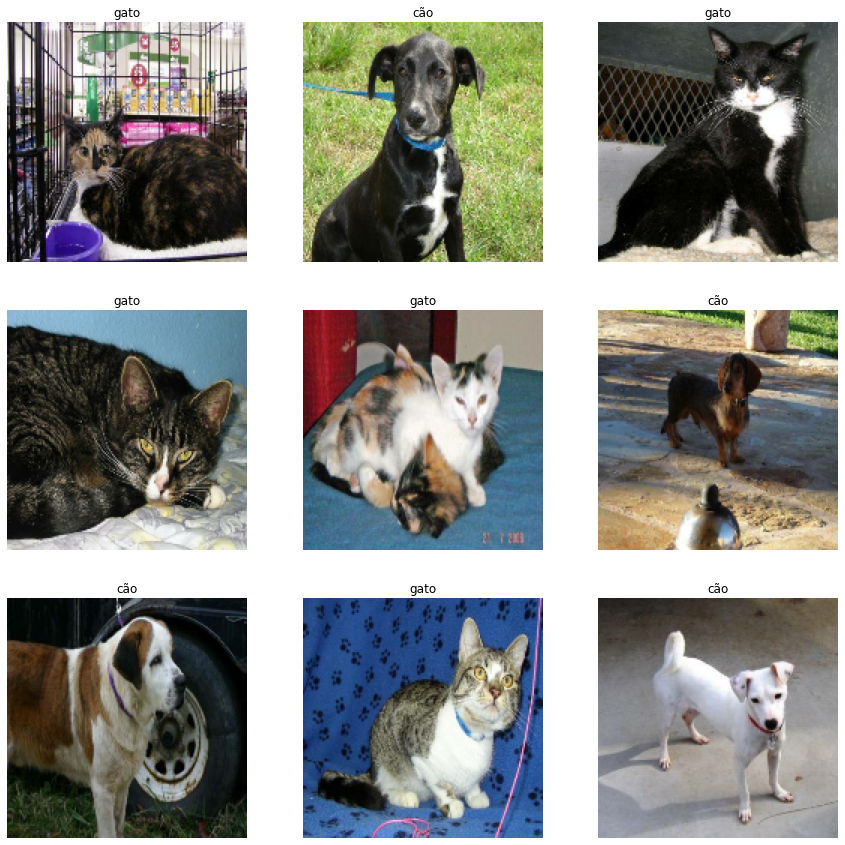

In [18]:
plot_dados(dados_teste)

<Figure size 432x288 with 0 Axes>

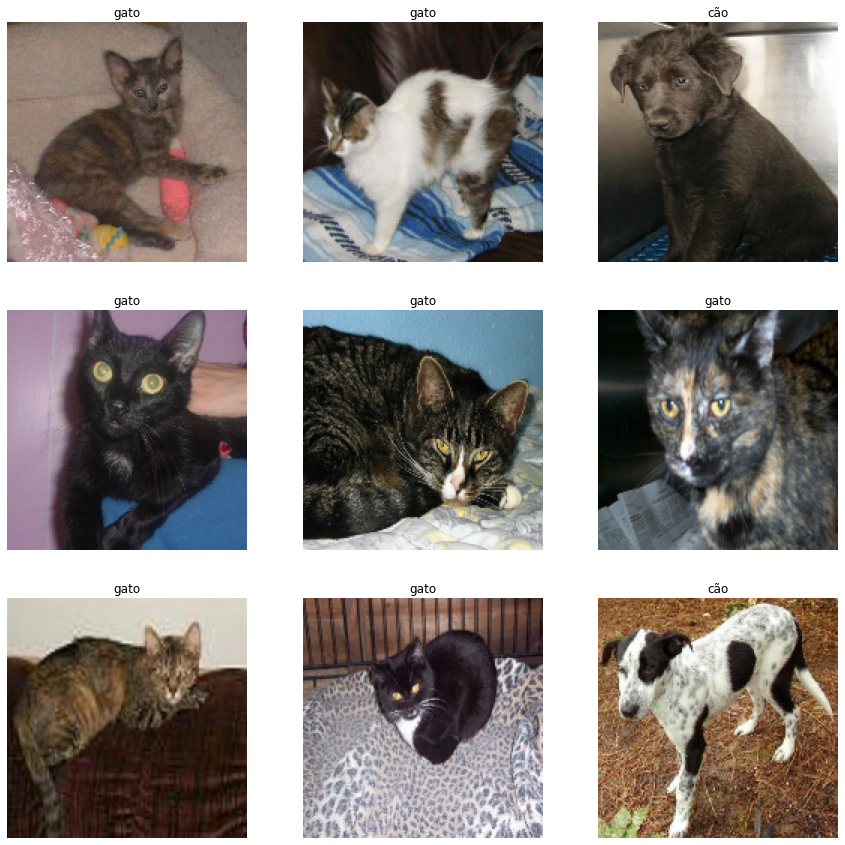

In [19]:
plot_dados(dados_validacao)

In [46]:
data_augmentation = tf.keras.models.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
                                               tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                               tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
                                               ])

In [45]:
model_transfer_learning = tf.keras.applications.MobileNetV2(input_shape = image_shape, include_top = False, weights = 'imagenet')

model_transfer_learning.trainable = False

model_transfer_learning.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReL

In [47]:
modelo = tf.keras.models.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1. / (image_color_channel_size / 2), 
                                                                                          offset = -1, input_shape = image_shape),
                                      data_augmentation,
                                      model_transfer_learning,
                                      tf.keras.layers.GlobalAveragePooling2D(),
                                      tf.keras.layers.Dropout(0.2),
                                      tf.keras.layers.Dense(1, activation = 'sigmoid')
                                      ])

adam = tf.keras.optimizers.Adam(learning_rate = 0.001)
loss = tf.keras.losses.BinaryCrossentropy()

modelo.compile(optimizer = adam,
               loss = loss, metrics = ['accuracy'])

modelo.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 sequential_8 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_14 (Dense)            (None, 1)                

In [48]:
history = modelo.fit(dados_treino, validation_data = dados_validacao, batch_size = 32, epochs = 20)

Epoch 1/20
63/63 [==============================] - 45s 657ms/step - loss: 0.3594 - accuracy: 0.8390 - val_loss: 0.1129 - val_accuracy: 0.9740
Epoch 2/20
63/63 [==============================] - 42s 669ms/step - loss: 0.1980 - accuracy: 0.9220 - val_loss: 0.0810 - val_accuracy: 0.9752
Epoch 3/20
63/63 [==============================] - 41s 648ms/step - loss: 0.1725 - accuracy: 0.9270 - val_loss: 0.0730 - val_accuracy: 0.9777
Epoch 4/20
63/63 [==============================] - 40s 627ms/step - loss: 0.1517 - accuracy: 0.9415 - val_loss: 0.0620 - val_accuracy: 0.9790
Epoch 5/20
63/63 [==============================] - 40s 631ms/step - loss: 0.1425 - accuracy: 0.9465 - val_loss: 0.0583 - val_accuracy: 0.9814
Epoch 6/20
63/63 [==============================] - 41s 647ms/step - loss: 0.1460 - accuracy: 0.9440 - val_loss: 0.0587 - val_accuracy: 0.9827
Epoch 7/20
63/63 [==============================] - 40s 629ms/step - loss: 0.1308 - accuracy: 0.9475 - val_loss: 0.0514 - val_accuracy: 0.9827

In [49]:
def plot_dados_previstos(dados):
  features, labels = dados.as_numpy_iterator().next()

  predictions = modelo.predict_on_batch(features).flatten()
  predictions = tf.where(predictions <0.5 , 0, 1)

  print('Labels:      %s' % labels)
  print('Predictions: %s' % predictions.numpy())

  plt.gcf().clear()
  plt.figure(figsize= (16,16))

  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')

    plt.imshow(features[i].astype('uint8'))
    plt.title(class_names[predictions[i]])

Labels:      [0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1]
Predictions: [0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1]


<Figure size 432x288 with 0 Axes>

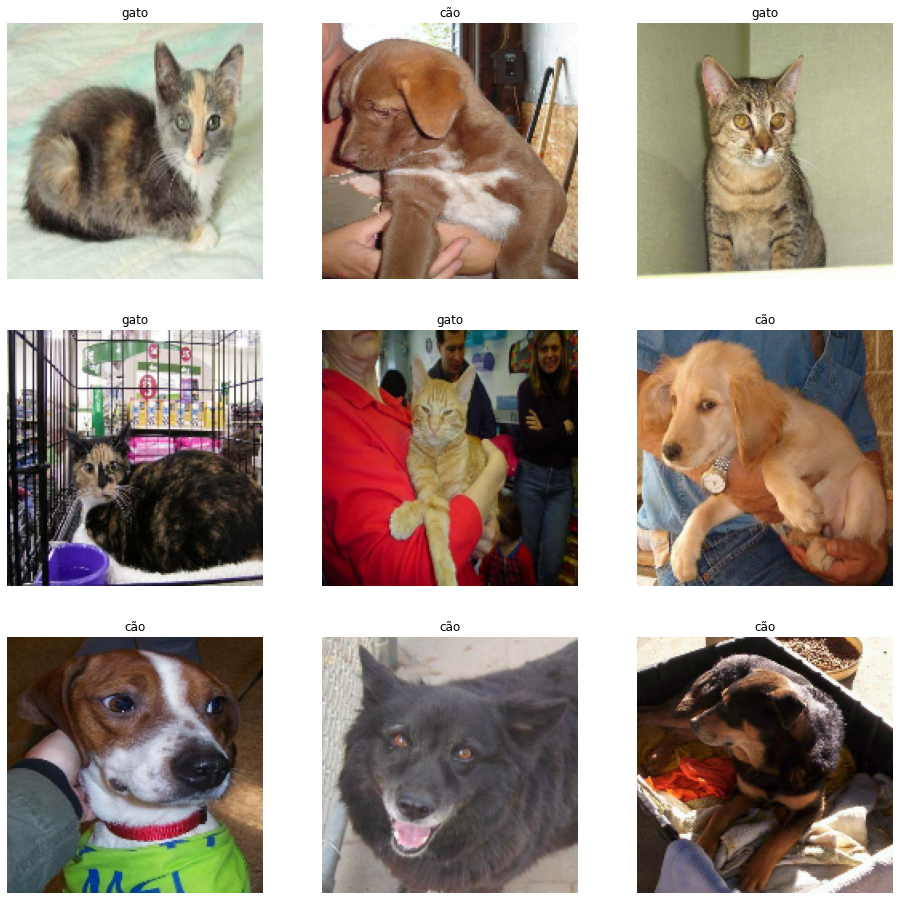

In [50]:
plot_dados_previstos(dados_teste)

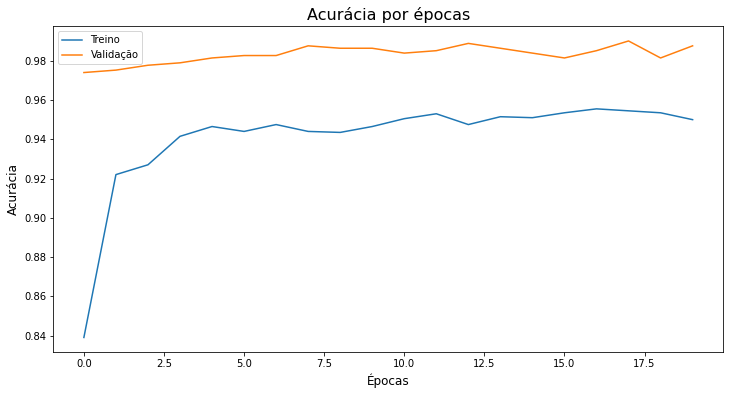

In [51]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia por épocas', fontsize = 16)
plt.xlabel('Épocas', fontsize = 12)
plt.ylabel('Acurácia', fontsize = 12)
plt.legend(['Treino','Validação'])

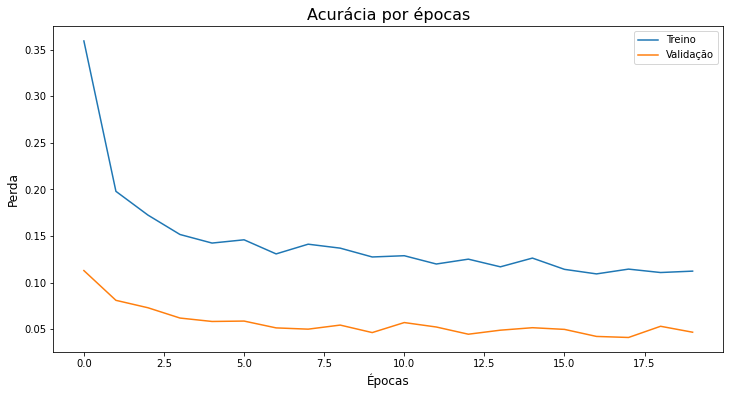

In [52]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Acurácia por épocas', fontsize = 16)
plt.xlabel('Épocas', fontsize = 12)
plt.ylabel('Perda', fontsize = 12)
plt.legend(['Treino','Validação'])

In [54]:
modelo.save('modelo')

INFO:tensorflow:Assets written to: modelo/assets


INFO:tensorflow:Assets written to: modelo/assets
